In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

Tanggal KodeLokasi  SuhuMin  SuhuMax  Hujan  Penguapan  SinarMatahari  \
0  3/22/2016        C18      9.2     27.2    0.0        5.2           10.4   
1  12/9/2011        C31     17.7     27.0    0.0        4.6            6.7   
2   6/9/2014         C3     14.4     22.4    0.0        4.4            3.9   
3  2/12/2014        C31     20.3     33.7    0.0       11.8           11.1   
4  6/18/2012        C24      8.1     18.2    0.0        1.6            5.1   

  ArahAnginTerkencang  KecepatanAnginTerkencang ArahAngin9am  ...  \
0                 SSW                        33           NE  ...   
1                  SW                        35            E  ...   
2                  SE                        28           SW  ...   
3                   E                        52            E  ...   
4                   W                        31            W  ...   

  Kelembaban9am  Kelembaban3pm  Tekanan9am  Tekanan3pm  Awan9am  Awan3pm  \
0            89             27      1018.6      1015.7        0        1   
1            55             41      1010.2      1008.6        7        6   
2            57             51      1022.6      1020.7        7        7   
3            54             33      1007.7      1005.6        5        5   
4            94             48      1027.1      1024.5        7        7   

   Suhu9am  Suhu3pm  BersaljuHariIni  BersaljuBesok  
0     13.9     26.3                0              0  
1     22.3     26.4                0              0  
2     18.3     20.9                0              0  
3     24.6     32.2                0              0  
4     10.3     17.7                0              0  

[5 rows x 23 columns]

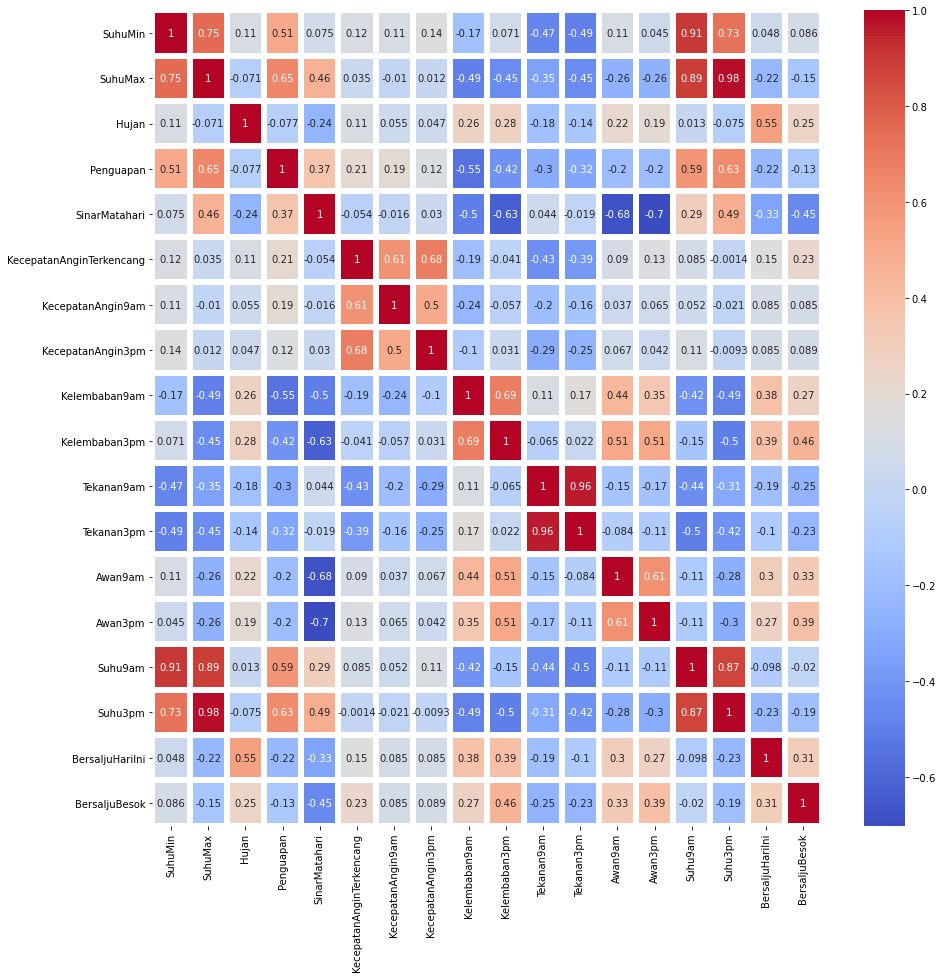

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),
            cmap='coolwarm',
            annot=True,linewidth=5);

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SuhuMax')

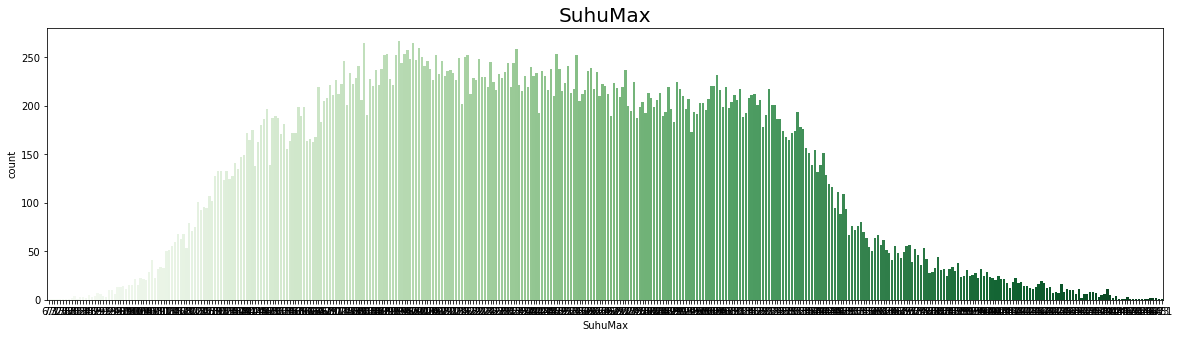

In [4]:
plt.figure(figsize = (20,5))
sns.countplot(data['SuhuMax'], palette = 'Greens')
plt.title('SuhuMax', fontsize = 20)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Suhu3pm')

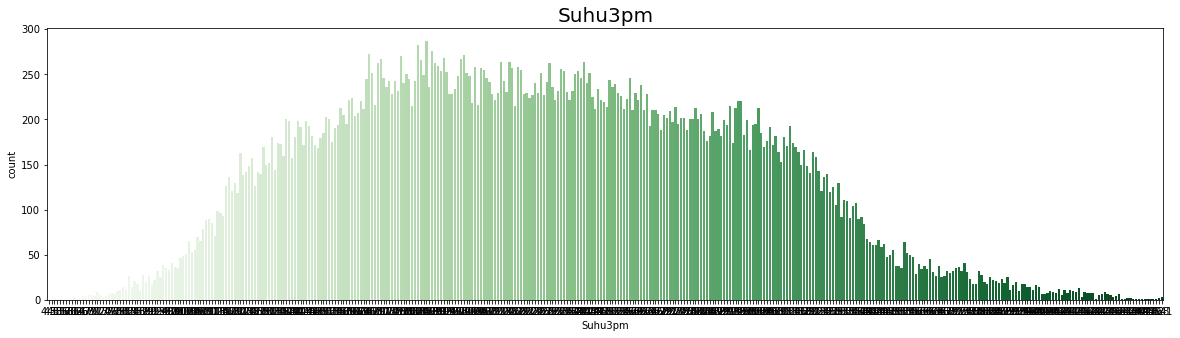

In [5]:
plt.figure(figsize = (20,5))
sns.countplot(data['Suhu3pm'], palette = 'Greens')
plt.title('Suhu3pm', fontsize = 20)

In [6]:
x = data[['SuhuMax', 'Suhu3pm']]
x.head()

SuhuMax  Suhu3pm
0     27.2     26.3
1     27.0     26.4
2     22.4     20.9
3     33.7     32.2
4     18.2     17.7

In [7]:
y = data['BersaljuHariIni']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: BersaljuHariIni, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Mengaktifkan fungsi klasifikasi
klasifikasi = KNeighborsClassifier(n_neighbors=5)

# Memasukkan data training pada fungsi klasifikasi
klasifikasi.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = klasifikasi.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
# Menentukan probabilitas hasil prediksi
klasifikasi.predict_proba(x_test)

array([[0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2]])

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[6970  706]
 [1842  368]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      7676
           1       0.34      0.17      0.22      2210

    accuracy                           0.74      9886
   macro avg       0.57      0.54      0.53      9886
weighted avg       0.69      0.74      0.71      9886



In [15]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.742261784341493